In [24]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Importing the data

In [25]:
bank0 = pd.read_csv('data/bank marketing v2.csv')

In [26]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
 14  p_recency  11162 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [27]:
bank0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes,None
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes,None
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes,None
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes,None
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes,None


In [28]:
bank0.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [29]:
bank0.deposit.value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

#### Modifying the target variable to have 0/1 values

In [30]:
bank0.deposit = bank0.deposit.map({'yes':1, 'no':0})

In [31]:
bank0.deposit.value_counts(normalize=True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

### Assessing the categorical variables

In [32]:
bank0.education.value_counts(normalize=True)

secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: education, dtype: float64

In [33]:
cat_cols = bank0.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'p_recency'],
      dtype='object')

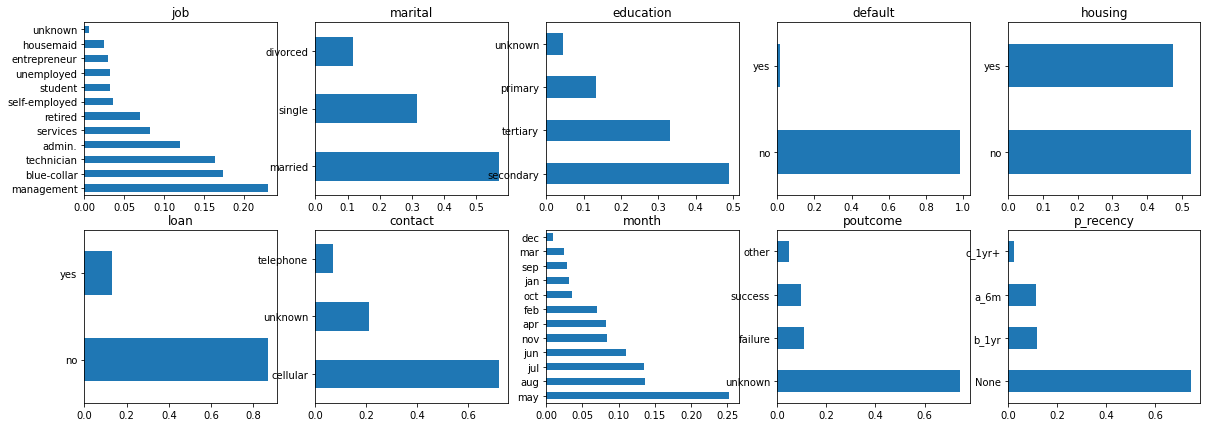

In [34]:
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,5,ind+1)
    bank0[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

In [35]:
bank0.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Numerical variables

In [36]:
num_cols = bank0.select_dtypes('number').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'deposit'], dtype='object')

**Dropping `day` and `duration` columns**

In [37]:
bank1 = bank0.drop(['duration','day'],axis=1)
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'deposit', 'p_recency'],
      dtype='object')

In [38]:
num_cols = bank1.select_dtypes('number').columns
num_cols = num_cols.drop('deposit')
num_cols

Index(['age', 'balance'], dtype='object')

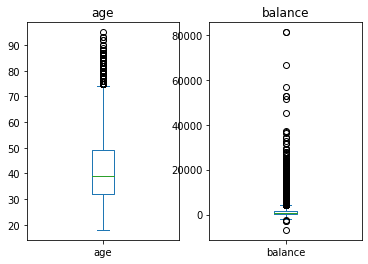

In [39]:
plt.figure(figsize=[6,4])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    bank1[col].plot.box()
    plt.title(col)
plt.show()

#### Creating dummy variables for the categorical variables

Handling `default`, `loan`, `housing`

In [40]:
def binary_map(col):
    return col.map({'no':0, 'yes':1})

In [41]:
binary_cols = ['default', 'loan', 'housing']

In [42]:
bank1[binary_cols] = bank1[binary_cols].apply(binary_map)

In [43]:
bank1.housing.value_counts()

0    5881
1    5281
Name: housing, dtype: int64

In [44]:
bank0.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

**Creating dummy features for education, marital, p_recency, poutcome, contact, job, month**

In [45]:
dumm_cols = ['education', 'marital', 'p_recency', 'contact','poutcome', 'job', 'month']

In [46]:
bank_dummies = pd.get_dummies(bank1[dumm_cols], drop_first=True)

In [47]:
bank_dummies.head()

,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+,contact_telephone,contact_unknown,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [48]:
bank_dummies.shape

(11162, 35)

In [49]:
bank1.drop(dumm_cols, axis=1)

,age,default,balance,housing,loan,deposit
0,59,0,2343,1,0,1
1,56,0,45,0,0,1
2,41,0,1270,1,0,1
3,55,0,2476,1,0,1
4,54,0,184,0,0,1
...,...,...,...,...,...,...
11157,32,0,1547,0,0,1
11158,47,0,1387,1,0,0
11159,34,0,320,1,0,1
11160,31,0,243,1,0,1


**Concatenating dummies back on**

In [50]:
bank1 = pd.concat([bank1, bank_dummies],axis=1)
bank1.drop(dumm_cols, axis=1, inplace=True)
bank1.shape

(11162, 41)

In [51]:
bank1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'deposit',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_married', 'marital_single', 'p_recency_a_6m',
       'p_recency_b_1yr', 'p_recency_c_1yr+', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

---

# Model building
 - dividing into train and test sets
 - MinMax scaling for numeric features
 - build multiple predictive models

#### Dividing into train and test datasets

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df_train, df_test = train_test_split(bank1, test_size=0.2, random_state=42, stratify=bank1.deposit)

In [54]:
df_train.shape, df_test.shape

((8929, 41), (2233, 41))

In [55]:
df_train.deposit.value_counts(normalize=True)

0    0.526151
1    0.473849
Name: deposit, dtype: float64

In [56]:
df_test.deposit.value_counts(normalize=True)

0    0.526198
1    0.473802
Name: deposit, dtype: float64

#### MinMax scaling for numeric features

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
df_train[['age', 'balance']].describe()

,age,balance
count,8929.000000,8929.000000
mean,41.198790,1520.609811
std,11.865935,3062.472471
min,18.000000,-6847.000000
25%,32.000000,121.000000
50%,39.000000,550.000000
75%,49.000000,1728.000000
max,95.000000,81204.000000


In [60]:
df_train[['age', 'balance']] = scaler.fit_transform(df_train[['age', 'balance']])

In [61]:
df_train[['age', 'balance']].describe()

,age,balance
count,8929.000000,8929.000000
mean,0.301283,0.095031
std,0.154103,0.034781
min,0.000000,0.000000
25%,0.181818,0.079136
50%,0.272727,0.084008
75%,0.402597,0.097387
max,1.000000,1.000000


In [62]:
df_test[['age', 'balance']] = scaler.transform(df_test[['age', 'balance']])

## Building predictive models

In [63]:
X_train = df_train.drop('deposit', axis=1)
y_train = df_train['deposit']
X_test = df_test.drop('deposit', axis=1)
y_test = df_test['deposit']

In [64]:
X_train.shape

(8929, 40)

In [65]:
y_train.shape, y_test.shape

((8929,), (2233,))

### Beginning with Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logreg = LogisticRegression(random_state=42)

In [68]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Evaluating the model**

In [69]:
y_train_pred = logreg.predict(X_train)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
accuracy_score(y_train, y_train_pred)

0.7098219285474298

In [72]:
confusion_matrix(y_train, y_train_pred)

array([[3905,  793],
       [1798, 2433]])

In [73]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      4698
           1       0.75      0.58      0.65      4231

    accuracy                           0.71      8929
   macro avg       0.72      0.70      0.70      8929
weighted avg       0.72      0.71      0.70      8929



**Performance on test set**

In [74]:
y_test_pred = logreg.predict(X_test)

In [75]:
accuracy_score(y_test, y_test_pred)

0.6932377966860725

### Using RandomForest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [78]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**Performance on the train set**

In [79]:
y_train_pred = rf.predict(X_train)

In [80]:
accuracy_score(y_train, y_train_pred)

0.9985440698846455

**Performance on unseen data**

In [81]:
y_test_pred = rf.predict(X_test)

In [82]:
accuracy_score(y_test, y_test_pred)

0.6932377966860725

# Model evaluation: Cross validation

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None


In [85]:
cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=-1)

array([0.70268757, 0.72228443, 0.7043673 , 0.70492721, 0.70644258])

In [86]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

array([0.68085106, 0.71444569, 0.68756999, 0.69036954, 0.68851541])

In [87]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.6923503376714628

**Takeaway: Cross validation score gives a far more reliable estimate of the generalized performance on unseen data**

**Note**: OOB Score in RandomForest is somewhat similar to cross val score

In [88]:
rf.oob_score_

0.6849591219621458

**Scoring methods in Cross val score**

In [89]:
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None


In [90]:
import sklearn

In [91]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [92]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.61111111, 0.65484634, 0.63002364, 0.63046045, 0.63002364])

# Feature selection

In [93]:
X_train.shape

(8929, 40)

### Recursive Feature Elimination - RFE

In [94]:
from sklearn.feature_selection import RFE

In [95]:
logreg = LogisticRegression(random_state=42)

In [96]:
rfe = RFE(estimator=logreg, n_features_to_select=10)

In [97]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10)

In [98]:
rfe.ranking_

array([31, 26,  1,  5,  7, 17, 15, 16, 13, 25, 14, 18,  1, 10,  1, 20,  1,
       30, 29, 23, 19, 22, 11, 21, 28,  1, 27, 12,  6,  4,  1,  9,  1,  3,
       24,  1,  8,  2,  1,  1])

In [99]:
X_train.columns[rfe.support_]

Index(['balance', 'p_recency_c_1yr+', 'contact_unknown', 'poutcome_success',
       'job_student', 'month_dec', 'month_jan', 'month_mar', 'month_oct',
       'month_sep'],
      dtype='object')

In [100]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(8929, 10)

In [101]:
X_train2.columns

Index(['balance', 'p_recency_c_1yr+', 'contact_unknown', 'poutcome_success',
       'job_student', 'month_dec', 'month_jan', 'month_mar', 'month_oct',
       'month_sep'],
      dtype='object')

Evaluation using cross val score

In [102]:
cross_val_score(logreg, X_train2, y_train, n_jobs=-1)

array([0.66741321, 0.67581187, 0.66573348, 0.67133259, 0.66330532])

## Cross validation for feature selection

In [103]:
num_features = X_train.shape
num_features[1]

40

In [104]:
cv_scores = []

In [105]:
logreg = LogisticRegression(random_state=42)

In [106]:
'''%%time
for features in range(1, num_features[1]+1):
    rfe = RFE(logreg, n_features_to_select=features)
    scores = cross_val_score(rfe, X_train, y_train, cv=4)
    cv_scores.append(scores.mean())'''

'%%time\nfor features in range(1, num_features[1]+1):\n    rfe = RFE(logreg, n_features_to_select=features)\n    scores = cross_val_score(rfe, X_train, y_train, cv=4)\n    cv_scores.append(scores.mean())'

In [107]:
'''plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), cv_scores)
plt.show()'''

'plt.figure(figsize=[10, 5])\nplt.plot(range(1, num_features[1]+1), cv_scores)\nplt.show()'

#### Using RFECV

In [108]:
from sklearn.feature_selection import RFECV

In [109]:
rfecv = RFECV(estimator=logreg, cv=4)

In [110]:
%%time
rfecv.fit(X_train, y_train)

CPU times: user 36.3 s, sys: 8.33 s, total: 44.7 s
Wall time: 5.73 s


RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [111]:
rfecv.grid_scores_

array([0.55380763, 0.60891506, 0.62078732, 0.62896198, 0.64340945,
       0.65248083, 0.65483273, 0.66446414, 0.6684959 , 0.6684959 ,
       0.67275222, 0.68271795, 0.68451092, 0.7022077 , 0.7046706 ,
       0.70478211, 0.70041528, 0.70187113, 0.70355133, 0.70444679,
       0.70433478, 0.70500642, 0.70870256, 0.71027126, 0.70758314,
       0.70758304, 0.70747093, 0.70679899, 0.7070226 , 0.70702275,
       0.70870286, 0.70825488, 0.70747078, 0.70724687, 0.70735868,
       0.7076947 , 0.70881467, 0.70870261, 0.70836659, 0.7085906 ])

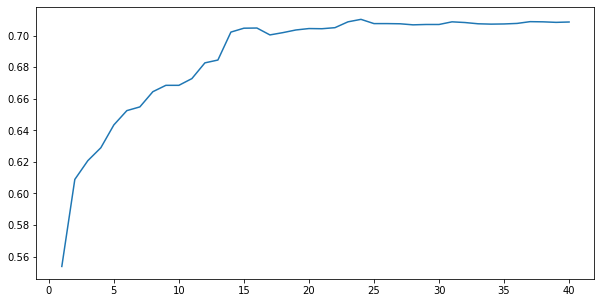

In [112]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [113]:
rfecv.n_features_

24

## Hyper-parameter tuning using Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [ ]:
?GridSearchCV

In [ ]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [ ]:
model_cv.fit(X_train, y_train)

In [ ]:
model_cv.best_score_

In [ ]:
model_cv.best_estimator_

In [ ]:
cv_df = pd.DataFrame(model_cv.cv_results_)

In [ ]:
cv_df.head()

In [ ]:
cv_df.sort_values(by='rank_test_score').head()

In [ ]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']

In [ ]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

### Understand better the effect of Hyper-parameter

In [ ]:
cv_df.columns

In [ ]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

In [ ]:
cv_df.groupby('param_max_depth')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

In [ ]:
cv_df.groupby('param_n_estimators')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

In [ ]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

In [ ]:
cv_df.groupby('param_max_features')['mean_train_score', 'mean_test_score'].agg(np.mean).plot(figsize=[8,5])
plt.show()

In [ ]:
cv_df.groupby('param_min_samples_leaf')['mean_train_score', 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

#### Fine-tuning using GridSearch

In [ ]:
hyper_parameters = {'min_samples_leaf': [5, 10, 20, 50],
                    'n_estimators': [50, 60, 70],
                    'max_features': [10, 12, 14, 16]    
}

In [ ]:
rf = RandomForestClassifier(max_depth=12, random_state=42, n_jobs=-1)

In [ ]:
model_cv2 = GridSearchCV(estimator=rf,
                        param_grid=hyper_parameters,
                        verbose=1,
                        cv=5,
                        return_train_score=True,
                        n_jobs=-1)

In [ ]:
model_cv2.fit(X_train, y_train)

In [ ]:
model_cv2.best_score_

In [ ]:
model_cv2.best_estimator_

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [ ]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [ ]:
model_rcv.fit(X_train, y_train)

In [ ]:
model_rcv.best_score_

In [ ]:
model_cv.best_score_

### Extracting the best model and asessing test performance

In [ ]:
model_cv2.best_score_

In [ ]:
rf_best = model_cv2.best_estimator_

In [ ]:
rf_best

In [ ]:
y_test_pred = rf_best.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

### Other cross validation schemes in Sklearn

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
?cross_val_score

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
folds = KFold(random_state=42, n_splits=5)

In [ ]:
scores = cross_val_score(logreg, X_train2, y_train, cv=folds, scoring="recall")
scores

Stratified KFold

In [ ]:
folds = StratifiedKFold(random_state=42, n_splits=5)

In [ ]:
scores = cross_val_score(logreg, X_train2, y_train, cv=folds, scoring="recall")
scores

#### Manually accessing the splits

In [ ]:
folds = KFold(random_state=42, n_splits=5)

In [ ]:
for train_ind, test_ind in folds.split(X_train2):
    test_X = X_train2.loc[test_ind,:]
    print(test_X.shape)

#### LeaveOneOut Scheme

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
folds = LeaveOneOut()

In [ ]:
X_train2.shape

In [ ]:
ctr = 0

In [ ]:
for train_ind, test_ind in folds.split(X_train2):
    ctr = ctr + 1

In [ ]:
ctr

In [ ]:
folds = LeaveOneOut()

In [ ]:
%%time
scores = cross_val_score(logreg, X_train2, y_train, cv=folds, n_jobs=-1)

In [ ]:
scores[:10]

In [ ]:
scores.mean()